# TP1 SI221 - Perceptron

## Question 1 - Synthetic data

### 1.1 - Exécuter l'algorithme 50 fois avec $\sigma = \{0.05,0.25,0.50,0.75\}$

#### Code pour générer les données et ajouter le bias à la fin de chaque vecteur de données

In [1]:
import numpy as np
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import random, math
import tiilab
from sklearn.datasets import make_blobs

def generate_data(sigma):
	X,y = make_blobs(n_samples=200, centers=[[-1,0],[1,0]], n_features=2, cluster_std=sigma)
	return add_bias(X),y

def add_bias(X):
	newX = []
	for x in X:
		newX.append((x[0],x[1],1))
	X=np.array(newX)
	return X

sigma = 0.05
X,y = generate_data(sigma)
plt.scatter(X[:,0],X[:,1],c=y)
plt.xlim((-2,2))
plt.ylim((-2,2))
plt.show()


#### Code pour afficher les données et l'hyperplan grâce au poids $w$

In [2]:
def affichage(X,y,w):
    plt.scatter(X[:,0],X[:,1],c=y)
    abs = np.arange(-1,1,0.01)
    f = -(w[0]/w[1]) * abs - (w[2]/w[1])
    plt.xlim((-2,2))
    plt.ylim((-2,2))
    plt.plot(abs,f)
    plt.show()

#### Code pour prédire le résultat attendu et pour calculer les poids en cas de fausse prédiction

4


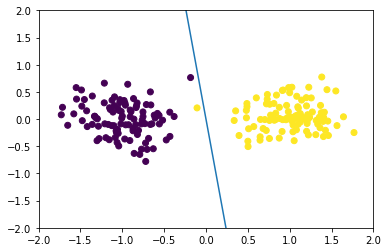

In [3]:
def predict(x, w):
	if(np.dot(w,x) > 0):
		return 1
	else:
		return 0
    
def train(data, y,eta):
    w=np.zeros(3)
    error=0
    for i in range(len(data)):
        prediction = predict(data[i], w)
        if(prediction != y[i]):
            error += 1
            if(prediction):
                w = w - eta * data[i]
            else:
                w = w + eta * data[i]
    return w,error

sigma = 0.3
eta=1
w=np.zeros(3)
X,y = generate_data(sigma)
w,error = train(X,y,eta)
print(error)
affichage(X,y,w)

#### Code pour effectuer N fois l'algorithme du perceptron avec différentes valeur de $\sigma$, et qui calcule le nombre d'erreur et la déviation pour chaque $\sigma$

In [4]:
def do_N_perceptron(N,eta,sigmas):
    e=np.zeros(4)
    s = np.zeros(4)
    for sigma in range(len(sigmas)):
        erreurs = np.zeros(N)
        for n in range(N):
            X,y = generate_data(sigmas[sigma])
            #X = add_bias(X_no_bias)
            w,erreurs[n] = train(X,y,eta)
            e[sigma] += erreurs[n]
        e[sigma] = e[sigma]/50
        s[sigma] = calcul_deviation(erreurs,e[sigma],N)
    return e,s

def calcul_deviation(erreurs,e,N):
	sum=0
	for i in range(N):
		sum += (erreurs[i]-e)**2
	s = np.sqrt(sum/50)
	return s

eta=1
sigmas = [0.05,0.25,0.5,0.75]
err, s = do_N_perceptron(50,eta,sigmas)
print("nombre d'erreurs : ",err)
print("deviation : ",s)

nombre d'erreurs :  [ 1.98  2.   10.42 27.98]
deviation :  [0.14       0.         2.69881455 5.17103471]


#### Code pour afficher le nombre d'erreur et la déviation sur un graphique en bar

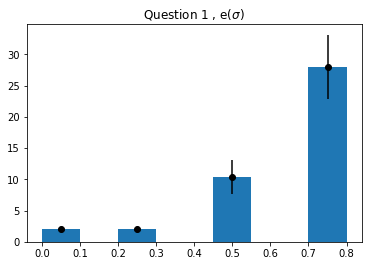

In [5]:
# Plot the results
plt.bar(sigmas,err, width=0.1, align="center")
plt.errorbar(sigmas,err,yerr=s, color='black', fmt='o')
plt.title("Question 1 , e($\sigma$) ")
plt.savefig("q1.png")
plt.show(block=False)


### 1.2 - Exécuter l'algorithme 50 fois avec $p=\{0,0.05,0.10,0.20\}$. On change le label du set de données avec une probabilité de $p$

#### Code pour effectuer N fois l'algorithme du perceptron avec différentes valeur de $p$ , et qui calcule le nombre d'erreur et la déviation pour chaque  p

taux d'erreurs et deviation :  [ 1.   20.48 37.   63.66]
deviation :  [0.         4.67007495 5.75499783 8.29122428]


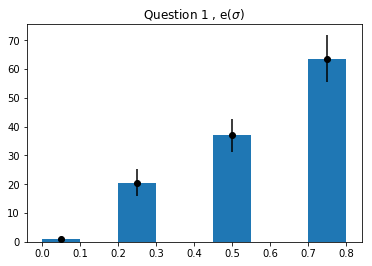

In [6]:
def do_N_perceptron_with_p(N,eta,p):
    e=np.zeros(4)
    s = np.zeros(4)
    for k in range(len(p)):
        erreurs = np.zeros(N)
        for n in range(N):
            X,y = generate_data(p[k])
            for i in range(len(X)):
                rd = random.random()
                if(rd<p[k]):
                    y[i] = 1 - y[i]
            w,erreurs[n] = train(X,y,eta)
            e[k] += erreurs[n]
        e[k] = e[k]/50
        s[k] = calcul_deviation(erreurs,e[k],N)
    return e,s

N=50
eta=0.1
p = [0,0.05,0.10,0.20]
err, s = do_N_perceptron_with_p(N,eta,p)

print("taux d'erreurs et deviation : ",err)
print("deviation : ",s)

# Plot the results
plt.bar(sigmas,err, width=0.1, align="center")
plt.errorbar(sigmas,err,yerr=s, color='black', fmt='o')
plt.title("Question 1 , e($\sigma$) ")
plt.savefig("q1.png")
plt.show(block=False)

## Question 2 - Image data: LANDSAT on Tarascon
### 2.1 - label 1 si $pixel < 30$, sinon label 2
#### Code pour charger et afficher une image

imz2mat : version janvier 2018.  Fichier à ouvrir : data/landsattarasconC4.ima
Dans ximaread : image monocanal
Dans ximaread : lecture du canal 0/1
image en .ima
image en .ima
image en .ima  512   512   canaux: 1  verif :  0
lecture de  data/landsattarasconC4.ima  en quelconque 512 512 1  offset  0 >B 1  complex 0 blocksize 262144
Données réelles. Nouvelle version de imz2mat  >B
Affichage d'une image reelle
Image seuillee : valmoy (86.344) + 3.000 sigma  (0.,152.41)
plt.show dans visusar : image 512 x 512


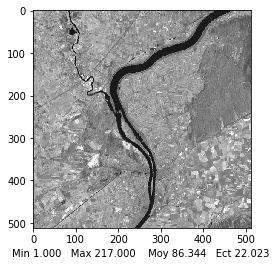

array([[ 74.,  82., 107., ...,  79.,  74.,  94.],
       [ 96., 111., 116., ...,  84.,  77.,  99.],
       [ 81., 109., 117., ...,  90.,  86.,  91.],
       ...,
       [ 78.,  82.,  80., ...,  61.,  69.,  65.],
       [ 81.,  76.,  78., ...,  57.,  58.,  65.],
       [ 83.,  81.,  84., ...,  57.,  54.,  65.]])

In [7]:
img=tiilab.imz2mat("data/landsattarasconC4.ima")
tiilab.visusar(img[0])

#### Code pour générer la matrice de label et l'afficher

Nombre de pixels de valeur < 30 =  11095


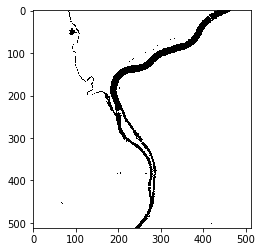

In [8]:
def evaluate_pixels1(image):
	nb_rows = len(image[0])
	nb_cols = len(image[0][0])
	labels=np.zeros((nb_rows,nb_cols))
	for row in range(nb_rows):
		for col in range(nb_cols):
			if(image[0][row][col] < 30):
				labels[row][col] = 1
			else:
				labels[row][col] = 2
	return labels

lab = evaluate_pixels1(img)
print("Nombre de pixels de valeur < 30 = ",np.sum(lab==1))
plt.imshow(lab)
plt.show()

#### Code pour prédire et calculer le nombre de mauvaises prédictions

In [9]:
def predict_im(x, w):
	if(np.dot(w,x) > 0):
		return 1
	else:
		return 2


[0.55215275 0.48241743]
251049


#### Code pour calculer les poids 

In [10]:
def train_image(image,labels,eta,w):
    nb_rows = len(image)
    nb_cols = len(image[1])
    errors=0
    for row in range(nb_rows):
        for col in range(nb_cols):
            prediction = predict_im((image[row][col],1),w)
            if(prediction != labels[row][col]):
                errors += 1
                if(prediction==1):
                    w = w - eta * np.array([image[row][col],1])
                else:
                    w = w + eta * np.array([image[row][col],1])
    return w,errors

eta=0.01
w=np.zeros(2)
w,err = train_image(img[0],lab,eta,w)
print(w)
print(err)

[-0.08  2.34]
492


#### Code de la fonction `error_correction`

In [11]:
def error_correction(image, labels, eta, weights, max_epoch):
    epoch=0
    old_weights=np.random.rand(2)
    while(np.allclose(weights,old_weights)==False):
        old_weights = weights
        weights,erreur = train_image(image,labels,eta,weights)
        epoch += 1
        print("epoch : ",epoch)
        print("weight :",weights)
        print("erreur : ",erreur)
        if(epoch==max_epoch):
            return weights,erreur,epoch
    return weights,erreur,epoch

w=np.zeros(2)
w,err,epoch = error_correction(img[0],lab,eta,w,-1)

print("final weights after "+str(epoch)+" executions : ",w)
print("final error "+str(epoch)+" executions : ",err)


epoch :  1
weight : [-0.08  2.34]
erreur :  492
epoch :  2
weight : [-0.08  2.34]
erreur :  0
final weights after 2 executions :  [-0.08  2.34]
final error 2 executions :  0


### 2.2 - label 1 si $pixel = 110$, sinon label 2
#### Code pour générer la matrice de label et l'afficher

Nombre de pixels de valeur = 110 =  13486


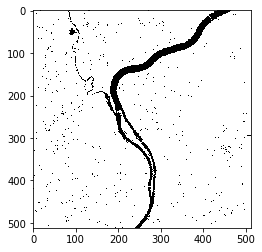

In [12]:
def evaluate_pixels2(image):
	nb_rows = len(image[0])
	nb_cols = len(image[0][0])
	labels=np.zeros((nb_rows,nb_cols))
	for row in range(nb_rows):
		for col in range(nb_cols):
			if(image[0][row][col] == 110) | (image[0][row][col] < 30):
				labels[row][col] = 1
			else:
				labels[row][col] = 2
	return labels

lab = evaluate_pixels2(img)
print("Nombre de pixels de valeur = 110 = ",np.sum(lab==1))
plt.imshow(lab)
plt.show()

#### Execution du perceptron 20 fois

In [13]:
epoch = 0
error = -1
eta=0.01
w = np.random.rand(2)
w,error,epoch = error_correction(img[0],lab,eta,w,20)
    
print("final weights after "+str(epoch)+" executions : ",w)
print("final error "+str(epoch)+" executions : ",error)

if(epoch==20):
    print("Perceptron Algorithm converged after "+str(epoch)+" iterations")
else:
    print("Perceptron Algorithm didn't converge after "+str(epoch)+" iterations")

epoch :  1
weight : [-0.96587865  9.28551615]
erreur :  6720
epoch :  2
weight : [-1.02587865 12.53551615]
erreur :  5757
epoch :  3
weight : [-0.27587865 14.02551615]
erreur :  5541
epoch :  4
weight : [-1.04587865 14.76551615]
erreur :  5414
epoch :  5
weight : [-1.00587865 15.24551615]
erreur :  5358
epoch :  6
weight : [-1.07587865 15.55551615]
erreur :  5363
epoch :  7
weight : [-1.05587865 15.80551615]
erreur :  5315
epoch :  8
weight : [-1.06587865 15.96551615]
erreur :  5290
epoch :  9
weight : [-0.34587865 16.00551615]
erreur :  5274
epoch :  10
weight : [-0.34587865 16.01551615]
erreur :  5291
epoch :  11
weight : [-0.34587865 16.02551615]
erreur :  5291
epoch :  12
weight : [-1.09587865 16.08551615]
erreur :  5300
epoch :  13
weight : [-0.34587865 16.02551615]
erreur :  5288
epoch :  14
weight : [-1.09587865 16.08551615]
erreur :  5300
epoch :  15
weight : [-0.34587865 16.02551615]
erreur :  5288
epoch :  16
weight : [-1.09587865 16.08551615]
erreur :  5300
epoch :  17
weigh

### 2.2 - label 1 si $pixel > 140$, sinon label 2
#### Code pour générer la matrice de label et l'afficher

Nombre de pixels de valeur > 140 =  12688


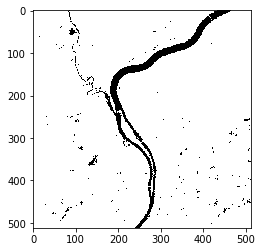

In [14]:
def evaluate_pixels3(image):
	nb_rows = len(image[0])
	nb_cols = len(image[0][0])
	labels=np.zeros((nb_rows,nb_cols))
	for row in range(nb_rows):
		for col in range(nb_cols):
			if(image[0][row][col] > 140) | (image[0][row][col] < 30):
				labels[row][col] = 1
			else:
				labels[row][col] = 2
	return labels

lab = evaluate_pixels3(img)
print("Nombre de pixels de valeur > 140 = ",np.sum(lab==1))
plt.imshow(lab)
plt.show()



#### Calcul du nombre d'epochs nécessaire avant que l'algorithme converge

In [15]:
w = np.random.rand(2)
eta=0.01
w,err,epoch = error_correction(img[0],lab,eta,w,20)

print("final weights after "+str(epoch)+" executions : ",w)
print("final error "+str(epoch)+" executions : ",err)

if(epoch==20):
    print("Perceptron Algorithm converged after "+str(epoch)+" iterations")
else:
    print("Perceptron Algorithm didn't converge after "+str(epoch)+" iterations")


epoch :  1
weight : [-0.26000805  8.26355566]
erreur :  3674
epoch :  2
weight : [-0.36000805 11.15355566]
erreur :  2915
epoch :  3
weight : [-0.38000805 12.40355566]
erreur :  2717
epoch :  4
weight : [-0.46000805 13.12355566]
erreur :  2594
epoch :  5
weight : [-0.40000805 13.48355566]
erreur :  2524
epoch :  6
weight : [-0.39000805 13.81355566]
erreur :  2525
epoch :  7
weight : [-0.47000805 13.93355566]
erreur :  2492
epoch :  8
weight : [-0.47000805 14.13355566]
erreur :  2504
epoch :  9
weight : [-0.47000805 14.20355566]
erreur :  2465
epoch :  10
weight : [-0.50000805 14.40355566]
erreur :  2492
epoch :  11
weight : [-0.40000805 14.34355566]
erreur :  2444
epoch :  12
weight : [-0.40000805 14.34355566]
erreur :  2456
final weights after 12 executions :  [-0.40000805 14.34355566]
final error 12 executions :  2456
Perceptron Algorithm didn't converge after 12 iterations
